**This notebook is intended for the initial cleaning and pre-processing of the dataset.**

In [36]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
df = pd.read_csv("flipkart_ecommerce_sample.csv") # reading the dataset

In [14]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


We can see that instead of having one category, the dataset provides us with a product category tree. 
To decide the primary category for each data point, I have first separated categories in the *product_category_tree*. I have also stored the number of categories for each product in *length[ ]*.

In [15]:
categories = []
length = []
category_tree = df["product_category_tree"]
for i in range(len(category_tree)):
    s = category_tree[i]
    s = s[2:-2]
    categories.append(s.split(' >> ')) # categories of a data point
    length.append(len(categories[i])) # number of categories

In [16]:
min(length)

1

We can see that the minimum number of categories for a product in the given dataset is 1, which is the root category, so we can conclude that ***the root category is the primary category***.

I have stored the root category for each product in *root_category[ ]*.

In [17]:
root_category = []
for i in range(len(categories)):
    root_category.append(categories[i][0])

In [18]:
root_category[:5]

['Clothing', 'Furniture', 'Footwear', 'Clothing', 'Pet Supplies']

In [19]:
df['root_category'] = root_category # adding the root category(primary label) column to the dataset

Total number of categories in the dataset -  265


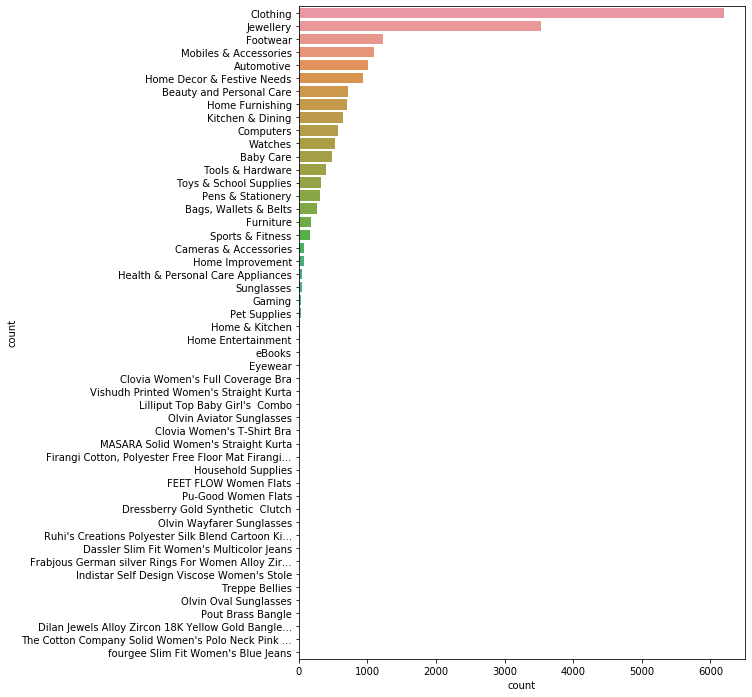

In [20]:
def plot_distribution():
    value_counts = df['root_category'].value_counts()
    print("Total number of categories in the dataset - ",len(value_counts))
    all_categories = value_counts.to_frame('count')
    all_categories['root_category'] = all_categories.index
    all_categories = all_categories.reset_index(drop = True)

    g = all_categories.nlargest(columns="count", n = 50) 
    plt.figure(figsize=(8,12)) 
    ax = sns.barplot(data=g, x= "count", y = "root_category") 
    ax.set(ylabel = 'count') 
    plt.show()
    


plot_distribution()

We can notice in the above bar plot that the dataset is very imbalanced and many classes do not have sufficient data as compared to their counter parts. We will remove these categories as they are just adding noise to the data.

The number of categories with less than 100 data points -

In [21]:
value_counts = df['root_category'].value_counts()
s = value_counts[value_counts < 100]
len(s)

247

Removing categories with less than 100 data points. 

Total number of categories in the dataset -  18


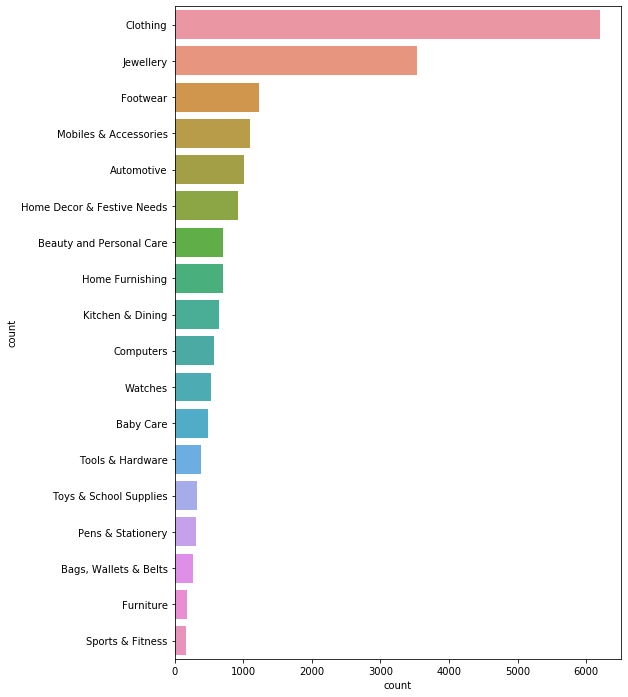

In [22]:
df = df.loc[df['root_category'].isin(df['root_category'].value_counts().index[df['root_category'].value_counts() > 100])]

plot_distribution() # to display 

The dataset is not quite balanced yet, but we will take care of that while modeling.

Number of classes - 18

In [23]:
print(df['description'].isnull().sum()) # number of data points with null description

2


In [24]:
df.dropna(subset=['description'], inplace=True) # removing the data points with null description
df = df.reset_index(drop = True) 

In [25]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,root_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
4,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing


**Cleaning the data**

1) Converting all the data into lower case

2) Replacing contractions

3) Removing all the special characters and extra space

In [26]:
description = df['description'].str.lower() # converting the description into lower case
description = description.tolist()

In [27]:
description[2]

'key features of aw bellies sandals wedges heel casuals,aw bellies price: rs. 499 material: synthetic lifestyle: casual heel type: wedge warranty type: manufacturer product warranty against manufacturing defects: 30 days care instructions: allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,specifications of aw bellies general ideal for women occasion casual shoe details color red outer material patent leather heel height 1 inch number of contents in sales package pack of 1 in the box one pair of shoes'

In [28]:
# Dictionary to replace contractions
mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"}

In [29]:
import re
def replace_contractions(s): # To replace contractions
    if s in mispell_dict.keys(): 
        s = mispell_dict[s]
    return s

def normalizeString(s): # to remove any special characters and extra space
    s = replace_contractions(s)
    s = s.replace('-', ' ')
    s = s.replace("'s", 's')
    s = re.sub(r"[^a-zA-Z0-9 ]+", r" ", s)
    s = s.strip()
    
    return s

for i in range(len(description)): # cleaning description for each data point in the dataset
    description[i] = str(description[i])
    description_split = description[i].split('\n\n')
    description[i] = ' '.join(description_split)
    description[i] = ' '.join(normalizeString(str.strip()) for str in description[i].split(' '))

In [30]:
description[0]

'key features of alisha solid womens cycling shorts cotton lycra navy red navy specifications of alisha solid womens cycling shorts shorts details number of contents in sales package pack of 3 fabric cotton lycra type cycling shorts general details pattern solid ideal for womens fabric care gentle machine wash in lukewarm water do not bleach additional details style code altht 3p 21 in the box 3 shorts'

In [31]:
df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,root_category
19282,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19283,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19284,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19285,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19286,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care


Storing the cleaned values and primary category in a new dataset.

In [32]:
new_df = pd.DataFrame()

new_df['product_name'] = df['product_name']
new_df['brand'] = df['brand']
new_df['description'] = description
new_df['label'] = df['root_category']

In [33]:
new_df.tail()

,product_name,brand,description,label
19282,WallDesign Small Vinyl Sticker,WallDesign,buy walldesign small vinyl sticker for rs 730 ...,Baby Care
19283,Wallmantra Large Vinyl Stickers Sticker,Wallmantra,buy wallmantra large vinyl stickers sticker fo...,Baby Care
19284,Elite Collection Medium Acrylic Sticker,Elite Collection,buy elite collection medium acrylic sticker fo...,Baby Care
19285,Elite Collection Medium Acrylic Sticker,Elite Collection,buy elite collection medium acrylic sticker fo...,Baby Care
19286,Elite Collection Medium Acrylic Sticker,Elite Collection,buy elite collection medium acrylic sticker fo...,Baby Care


In [34]:
new_df = new_df.sample(frac = 1) # randomly shuffling the dataset
new_df = new_df.reset_index(drop = True)

In [35]:
new_df.tail()

,product_name,brand,description,label
19282,Dora Series Dora Art Satin Pencil Box,NaN,flipkart com buy dora series dora art satin pe...,Pens & Stationery
19283,ShellysTrends Planters Plant Container Set,ShellysTrends,shellystrends planters plant container set met...,Tools & Hardware
19284,Knotty Derby Goyle Ankle Boots,NaN,knotty derby goyle ankle boots buy knotty der...,Footwear
19285,S4S Comfortable Women's Full Coverage Bra,White,s4s comfortable womens full coverage bra buy ...,Clothing
19286,"Addiction Rio,Vegas Gift Set Combo Set",NaN,flipkart com buy addiction rio vegas gift set ...,Beauty and Personal Care


In [76]:
new_df.to_csv('data/flipkart_ecommerce_processed_sample.csv')